# Import Libraries 

In [1]:
# Importing required libraries

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

# Loading of Dataset

In [2]:
# Loading dataset and drop unneeded labels

Diets_Dataset = pd.read_csv('./Diets_Dataset.csv')
Diets_Dataset.drop(columns=['Extraction_day','Extraction_time'],inplace=True)

In [3]:
# Example of records

Diets_Dataset.head(20)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55
5,paleo,Paleo Shrimp-Stuffed Mushrooms recipes,mediterranean,68.62,34.15,42.44
6,paleo,Paleo Pumpkin Pie recipes,american,30.03,275.88,97.68
7,paleo,Autoimmune Paleo Pesto,italian,4.25,14.15,72.90
8,paleo,Baked Banana Chip Encrusted French Toast,french,152.88,1874.52,385.80
9,paleo,Vietnamese Pho Pressure Cooker (Noodle Soup),south east asian,602.91,274.87,400.01


In [4]:
# Naming main variables

Macronutrients = ['Carbs(g)','Protein(g)','Fat(g)']
Diets = ['dash', 'keto', 'mediterranean', 'paleo', 'vegan']

# Transformation of Macronutrient Values

For comparing the nutritional values (macronutrients) between the different types of diets, each macronutrient value was rescaled to its proportional contribution from the total macronutrients in each recipe.

This transformation will make it possible to analyze and compare the presence of each macronutrient in the different diets.

In [5]:
# Creating labels for total macronutrients supply

Diets_Dataset['Total_Macronutrients'] = Diets_Dataset[Macronutrients].apply(sum,axis=1)

In [6]:
# Transforming each macronutrient value into its proportional contribution

for macronutrient in Macronutrients:
    Diets_Dataset[macronutrient] /= Diets_Dataset['Total_Macronutrients']

# Plotting of Macronutrients by Type of Diet

Including outliers, these plots show what the macronutrient distributions are like by diet type. Showing that each diet has different distributions.

Also, a high concentration of outliers can be observed, so it is necessary to treat them to obtain more meaningful results.

## Plotting Functions

In [17]:
# Function for creating an interactive plot of macronutrients by diet

def InteractivePlotMacronutientsByDiet(Diet:str):
    diet_type_dataset = Diets_Dataset.query("Diet_type == @Diet")
    Macronutrients = ['Protein(g)','Carbs(g)','Fat(g)']
    def PlotMacronutients(TypePlot:str):
        Display = "PPCC\n.FF."
        fig , axes = plt.subplot_mosaic(Display,figsize=(12,8),layout='tight')
    
        ConfigPlot = zip(Macronutrients,['P','C','F'],['red','green','yellow'])
        if TypePlot == 'histogram':
            for macronutrient , display , color in ConfigPlot:
                sns.histplot(data=diet_type_dataset,x=macronutrient,ax=axes[display],stat='proportion',bins=50,color=color)
                axes[display].set_title(macronutrient[:-3])
                axes[display].set_xlabel('Grams')

        elif TypePlot == 'boxplot':
            for macronutrient , display , color in ConfigPlot:
                sns.boxplot(data=diet_type_dataset,x=macronutrient,ax=axes[display],color=color)
                axes[display].set_title(macronutrient[:-3])
                axes[display].set_xlabel('Grams')
    
        fig.suptitle(f'Diet: {Diet}',size=25)
    
    interact(PlotMacronutients,TypePlot=['histogram','boxplot'])

In [18]:
# Function for plotting macronutrients by diet

def PlotMacronutrients():
    Display = "PPCC\n.FF."
    fig , axes = plt.subplot_mosaic(Display,figsize=(12,8),layout='tight')
        
    ConfigPlot = zip(Macronutrients,['P','C','F'],['red','green','yellow'])
    for macronutrient , display , color in ConfigPlot:
        sns.boxplot(data=Diets_Dataset,x=macronutrient,y='Diet_type',ax=axes[display],color=color)
        axes[display].set_title(macronutrient[:-3])
        axes[display].set_xlabel('Grams')
    
    fig.suptitle('Distribution of Macronutrients by Diet',size=25)

## Plotting of Macronutrients

In [11]:
# Plotting of macronutrient values by type of diet

for diet in Diets:
    InteractivePlotMacronutientsByDiet(diet)

interactive(children=(Dropdown(description='TypePlot', options=('histogram', 'boxplot'), value='histogram'), O…

interactive(children=(Dropdown(description='TypePlot', options=('histogram', 'boxplot'), value='histogram'), O…

interactive(children=(Dropdown(description='TypePlot', options=('histogram', 'boxplot'), value='histogram'), O…

interactive(children=(Dropdown(description='TypePlot', options=('histogram', 'boxplot'), value='histogram'), O…

interactive(children=(Dropdown(description='TypePlot', options=('histogram', 'boxplot'), value='histogram'), O…

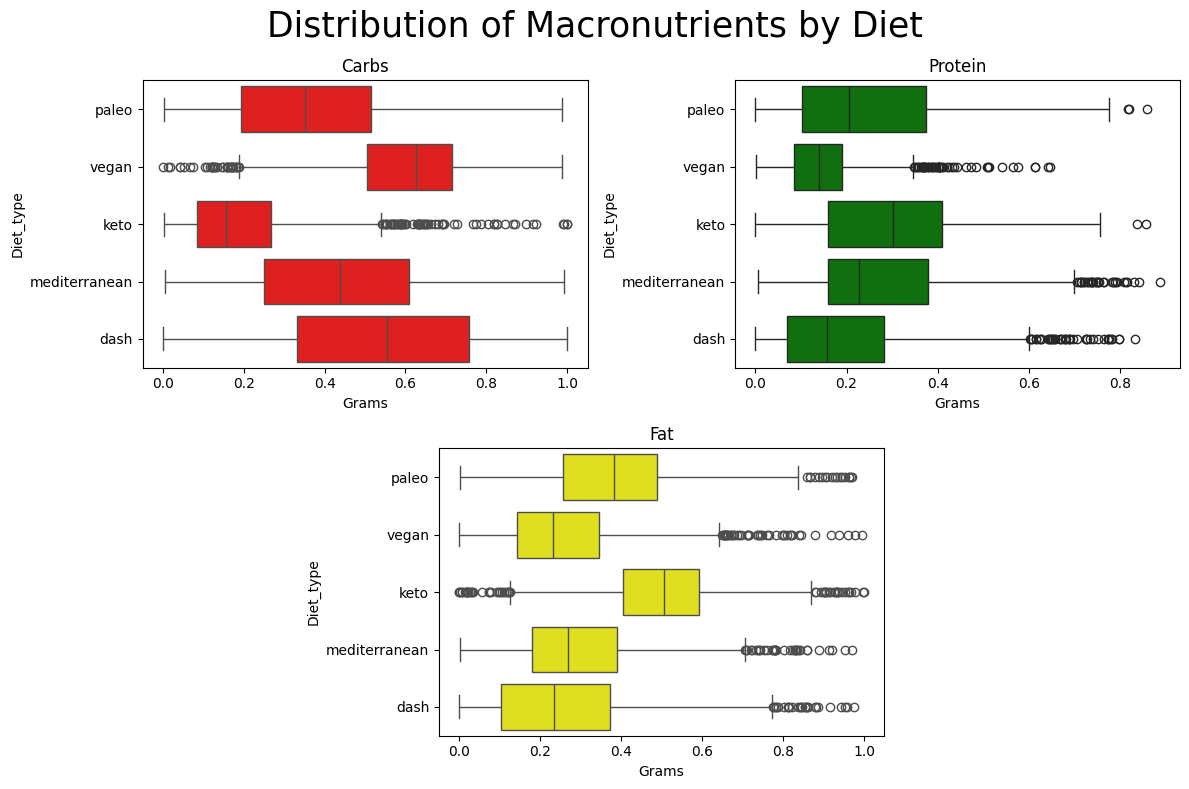

In [16]:
# Plotting of macronutrient values

PlotMacronutrients()

# Correlation by Macronutrient in each Type of Diet

!! Mention the behavior of the correlations with respect to the description of the diets

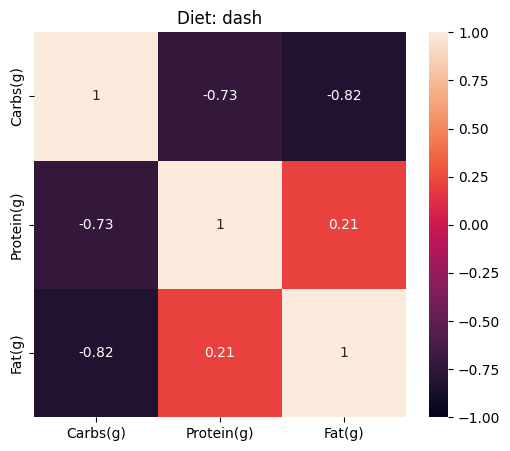

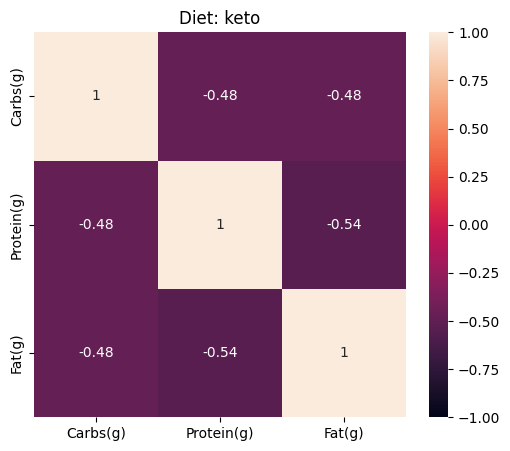

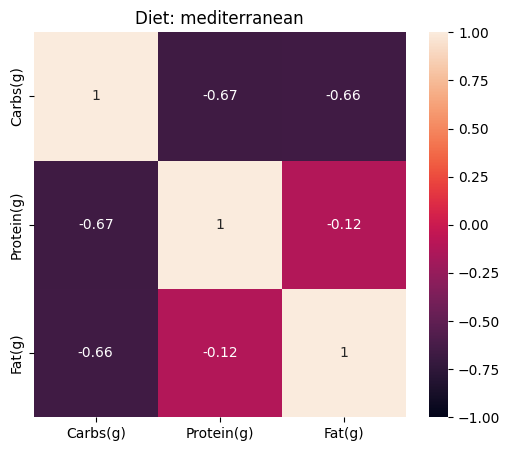

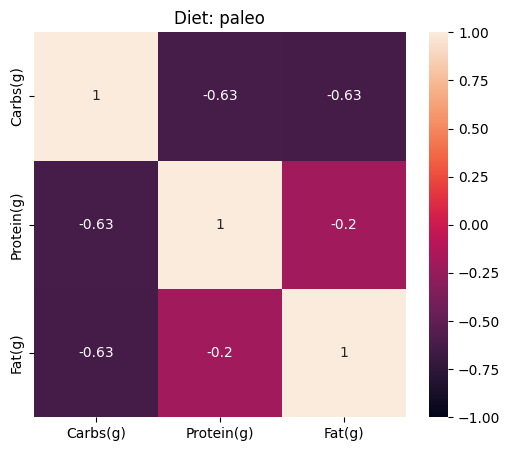

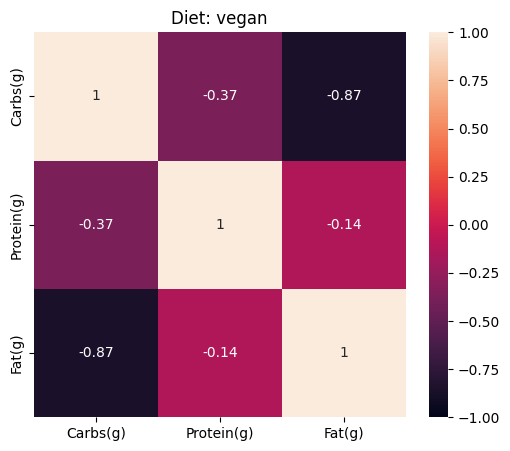

In [27]:
# Plotting correlation matrix

for index_plot , diet in enumerate(Diets):
    fig , axes = plt.subplots(figsize=(6,5))
    sns.heatmap(Diets_Dataset.query("Diet_type == @diet")[Macronutrients].corr(),annot=True,vmin=-1,vmax=1,ax=axes)
    axes.set_title(f"Diet: {diet}")